In [142]:
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import math

In [143]:
os.chdir("E:/AI/assignment_2_online")

In [144]:
romania=pd.read_pickle("romania_graph.pickle")

In [146]:
print(nx.info(romania))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 23
Average degree:   2.3000


C:\Users\huimi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\huimi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\huimi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


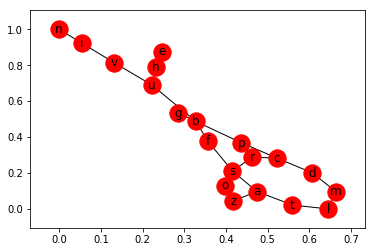

In [149]:
nx.draw_networkx(romania, with_labels=True)

In [53]:
atlanta=pd.read_pickle("atlanta_osm.pickle")

In [150]:
start='a'
goal='c'
graph=romania

In [153]:
def ucs(graph,start,goal):
    frontier={start:(0,"start")}
    explored={} 
    while True:
        #print("frontier: ", frontier)
        shortest_dist=float('inf')
        for key, value in frontier.items():           
            if value[0]<shortest_dist:
                shortest_dist=value[0]
                to_be_explored=key
        explored[to_be_explored]=frontier[to_be_explored][1]
        for key,value in graph[to_be_explored].items():
            if key in explored.keys():
                continue
            if key in frontier.keys():
                new_distance=frontier[to_be_explored][0]+value['weight']
                if new_distance<frontier[key][0]:
                    frontier[key]=(new_distance,to_be_explored)
            else:
                distance=frontier[to_be_explored][0]+value['weight']
                frontier[key]=(distance,to_be_explored)
        frontier.pop(to_be_explored)    
        if to_be_explored==goal:
            invers_path=[goal]
            while True:
                next=invers_path[-1]
                if next==start:
                    path=invers_path[::-1]
                    return path
                else:
                    invers_path.append(explored[next])

In [154]:
path=ucs(graph,start,goal)

In [158]:
print("Shortest path from %s to %s is:"%(start,goal), "->".join(path)) 

Shortest path from a to c is: a->s->r->c


In [159]:
def heuristic(graph,a,b):
    return math.sqrt((graph.node[a]['pos'][0]-graph.node[b]['pos'][0])**2+(graph.node[a]['pos'][1]-graph.node[b]['pos'][1])**2)

In [160]:
def Astar(graph,start,goal):
    frontier={start: (0, heuristic(graph,start,goal),"start")}
    explored={}
    while True:
        shortest=float('inf')
        for key,value in frontier.items():
            if value[0]+value[1]<shortest:
                shortest=value[0]+value[1]
                to_be_explored=key
        explored[to_be_explored]=frontier[to_be_explored][2]
        if to_be_explored==goal:
            invers_path=[goal]
            while True:
                next=invers_path[-1]
                if next==start:
                    path=invers_path[::-1]
                    return path
                else:
                    invers_path.append(explored[next])
        for key,value in graph[to_be_explored].items():
            if key in explored.keys():
                continue
            elif key in frontier.keys():
                distance=frontier[to_be_explored][0]+value['weight']
                if distance<frontier[key][0]:
                    frontier[key]=(distance,heuristic(graph,key,goal),to_be_explored)
            else:
                distance=frontier[to_be_explored][0]+value['weight']
                frontier[key]=(distance,heuristic(graph,key,goal),to_be_explored)
        frontier.pop(to_be_explored)

In [161]:
path=Astar(graph,start,goal)

In [162]:
print("Shortest path from %s to %s is:"%(start,goal), "->".join(path)) 

Shortest path from a to c is: a->s->r->c
